In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200

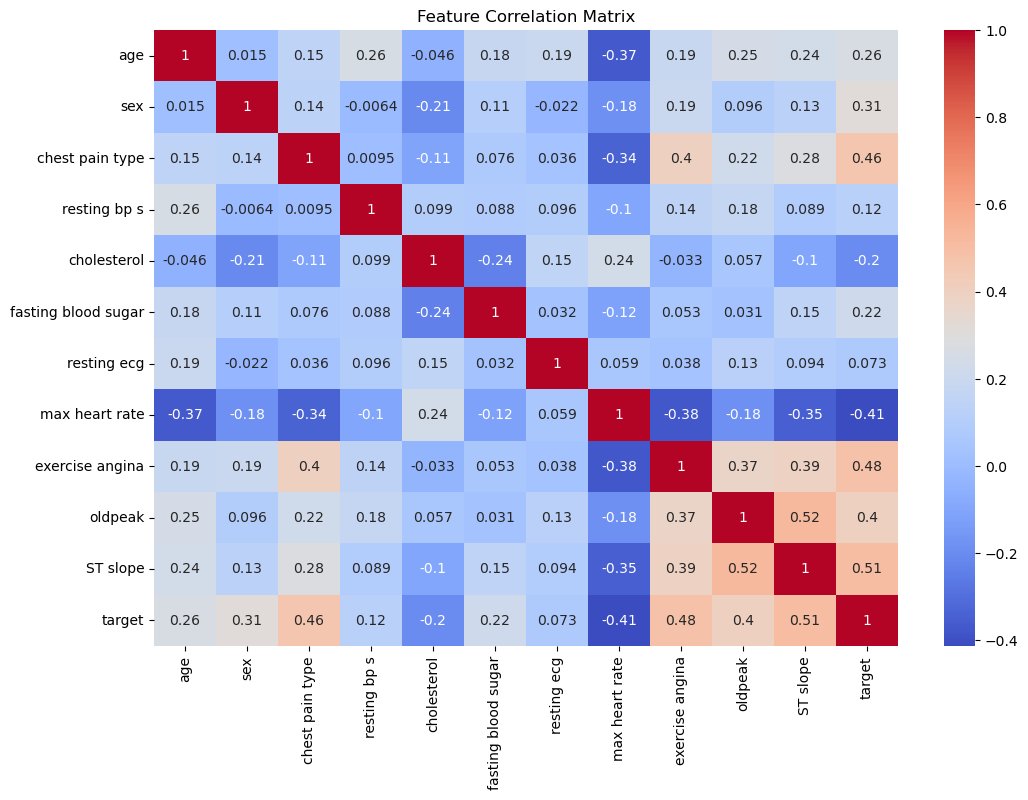

In [7]:
# Load the dataset
data = pd.read_csv('C:/Users/aahir/OneDrive/Desktop/DetectHeartDiseaseUsingPatientData/data/heart_disease_data.csv')


# Display the first few rows of the dataset
data.head()

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())

# Data visualization (e.g., correlation heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
data.columns = data.columns.str.replace(' ', '_')


print(data.columns)

# Encode categorical variables using the correct updated column names
data = pd.get_dummies(data, columns=['sex_1', 'chest_pain_type_2', 'fasting_blood_sugar_1', 'resting_ecg_1', 'exercise_angina_1', 'ST_slope_1'], drop_first=True)

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak',
       'target', 'sex_1', 'chest_pain_type_2', 'chest_pain_type_3',
       'chest_pain_type_4', 'fasting_blood_sugar_1', 'resting_ecg_1',
       'resting_ecg_2', 'exercise_angina_1', 'ST_slope_1', 'ST_slope_2',
       'ST_slope_3'],
      dtype='object')


In [20]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Logistic Regression Accuracy: 0.8697478991596639
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.87      0.90      0.88       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

Random Forest Accuracy: 0.9537815126050421
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



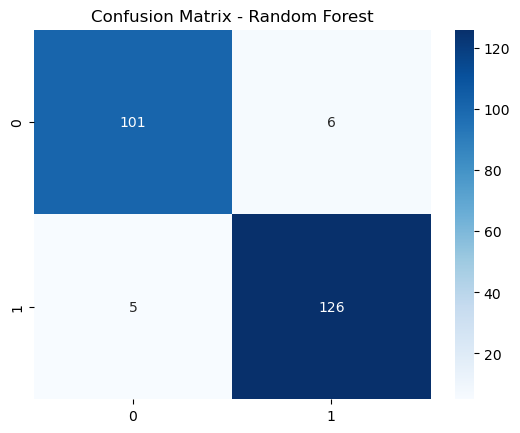

In [21]:
# Logistic Regression Evaluation
y_pred_logreg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Random Forest Evaluation
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [23]:
import os
import joblib

# Define the directory where the model will be saved
model_dir = 'models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the model
joblib.dump(rf_clf, os.path.join(model_dir, 'heart_disease_model.pkl'))



['models\\heart_disease_model.pkl']

In [26]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('models\\heart_disease_model.pkl')

# Sample prediction with all 16 features (make sure these are in the right order)
sample_data = np.array([[57, 130, 230, 0, 1.4, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]])  # Adjust values as needed
prediction = model.predict(sample_data)
print("Prediction (0 = Normal, 1 = Heart Disease):", prediction)



Prediction (0 = Normal, 1 = Heart Disease): [1]
